# Tratamento e Análise dados Betano

In [2]:
#IMPORTANDO AS BIBLIOTECAS NECESSÃRIAS
import pandas as pd

In [50]:
# CARREGANDO DATA DO CSV
df_ba = pd.read_csv('dados/jogos_betanoBrasil.csv', on_bad_lines='skip') # PULA LINHAS MAL FORMATADAS

## Tratamento dos dados
- Renomear as colunas
- Eliminar colunas inuteis
- Tratamento dos nulos
- Ajuste dos tipos

In [51]:
# Renomeando as colunas
df_ba.columns = ['data', 'hora', 'time_casa', 'time_visitante',
                 'resultado final', 'casa_ganha', 'empate', 'visitante_ganha',
                 'total_mais/menos', '+', 'maisq', '-', 'menosq', 'ambasmarcam',
                 'sim', 'simodd', 'não', 'nãoodd', 'dejn']

In [52]:
df_ba.head(6)

,data,hora,time_casa,time_visitante,resultado final,casa_ganha,empate,visitante_ganha,total_mais/menos,+,maisq,-,menosq,ambasmarcam,sim,simodd,não,nãoodd,dejn
0,30/01,22:00,Club Atletico Tucuman II,Boca Juniors II,Resultado Final,3.90,3.50,1.82,Total de Gols Mais/Menos,+,1.98,-,1.65,Ambas equipes Marcam,Sim,1.88,Não,1.72,31.0
1,30/01,22:00,CF Tigres UANL (F),Deportivo Toluca FC (F),Resultado Final,1.07,10.00,14.50,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30/01,22:10,Once Caldas,Deportes Tolima,Resultado Final,2.32,2.92,3.60,Total de Gols Mais/Menos,+,2.70,-,1.47,Ambas equipes Marcam,Sim,2.15,Não,1.65,271.0
3,31/01,00:00,Mazatlán FC (F),Cruz Azul (F),Resultado Final,6.50,4.75,1.36,Total de Gols Mais/Menos,+,1.52,-,2.20,16,NaN,NaN,NaN,NaN,NaN
4,31/01,00:05,Guadalajara Chivas (F),Juarez (F),Resultado Final,1.42,4.70,5.50,Total de Gols Mais/Menos,+,1.60,-,2.05,16,NaN,NaN,NaN,NaN,NaN
5,31/01,05:30,Manipur,Punjab FC,Resultado Final,1.47,4.05,5.70,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Eliminando as colunas inuteis
df_ba.drop(['total_mais/menos', '+', '-','resultado final', 'ambasmarcam', 'sim', 'não', 'dejn'], axis='columns', inplace=True)

In [54]:
df_ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             298 non-null    object 
 1   hora             298 non-null    object 
 2   time_casa        298 non-null    object 
 3   time_visitante   298 non-null    object 
 4   casa_ganha       298 non-null    float64
 5   empate           298 non-null    float64
 6   visitante_ganha  298 non-null    float64
 7   maisq            293 non-null    float64
 8   menosq           293 non-null    float64
 9   simodd           282 non-null    float64
 10  nãoodd           282 non-null    float64
dtypes: float64(7), object(4)
memory usage: 26.8+ KB


In [55]:
# Tratando os nulos
# REMOVENDO TODAS AS COLUNAS QUE POSSUEM APENAS VALORES NULOS
df_semNulo = df_ba.dropna(how = 'all',axis='rows') # type: ignore

In [56]:
df_semNulo.head(6)

,data,hora,time_casa,time_visitante,casa_ganha,empate,visitante_ganha,maisq,menosq,simodd,nãoodd
0,30/01,22:00,Club Atletico Tucuman II,Boca Juniors II,3.90,3.50,1.82,1.98,1.65,1.88,1.72
1,30/01,22:00,CF Tigres UANL (F),Deportivo Toluca FC (F),1.07,10.00,14.50,NaN,NaN,NaN,NaN
2,30/01,22:10,Once Caldas,Deportes Tolima,2.32,2.92,3.60,2.70,1.47,2.15,1.65
3,31/01,00:00,Mazatlán FC (F),Cruz Azul (F),6.50,4.75,1.36,1.52,2.20,NaN,NaN
4,31/01,00:05,Guadalajara Chivas (F),Juarez (F),1.42,4.70,5.50,1.60,2.05,NaN,NaN
5,31/01,05:30,Manipur,Punjab FC,1.47,4.05,5.70,NaN,NaN,NaN,NaN


In [57]:
df_semNulo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             298 non-null    object 
 1   hora             298 non-null    object 
 2   time_casa        298 non-null    object 
 3   time_visitante   298 non-null    object 
 4   casa_ganha       298 non-null    float64
 5   empate           298 non-null    float64
 6   visitante_ganha  298 non-null    float64
 7   maisq            293 non-null    float64
 8   menosq           293 non-null    float64
 9   simodd           282 non-null    float64
 10  nãoodd           282 non-null    float64
dtypes: float64(7), object(4)
memory usage: 27.9+ KB


In [58]:
df_semNulo['data'] = pd.to_datetime(df_semNulo['data'], format='%d/%m')

C:\Users\lucad\AppData\Local\Temp\ipykernel_28968\3036133766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_semNulo['data'] = pd.to_datetime(df_semNulo['data'], format='%d/%m')


In [59]:
df_semNulo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298 entries, 0 to 309
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             298 non-null    datetime64[ns]
 1   hora             298 non-null    object        
 2   time_casa        298 non-null    object        
 3   time_visitante   298 non-null    object        
 4   casa_ganha       298 non-null    float64       
 5   empate           298 non-null    float64       
 6   visitante_ganha  298 non-null    float64       
 7   maisq            293 non-null    float64       
 8   menosq           293 non-null    float64       
 9   simodd           282 non-null    float64       
 10  nãoodd           282 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 27.9+ KB


## Analise dos dados
- Buscando outliers
- Verificando as distribuições
- Buscar relações entre variaveis

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

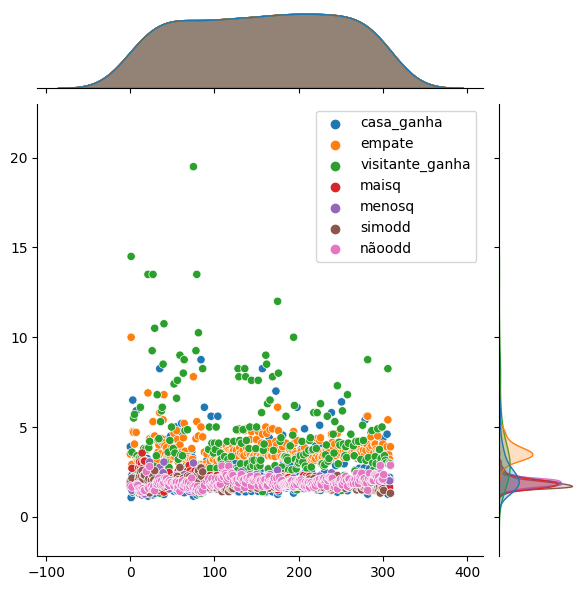

In [78]:
sns.jointplot(data=df_semNulo)

<AxesSubplot: >

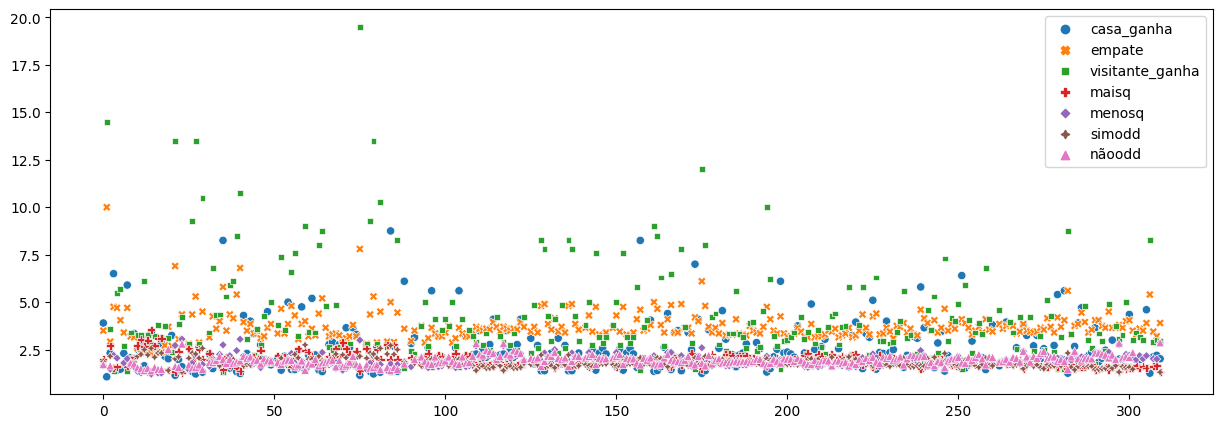

In [81]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_semNulo)

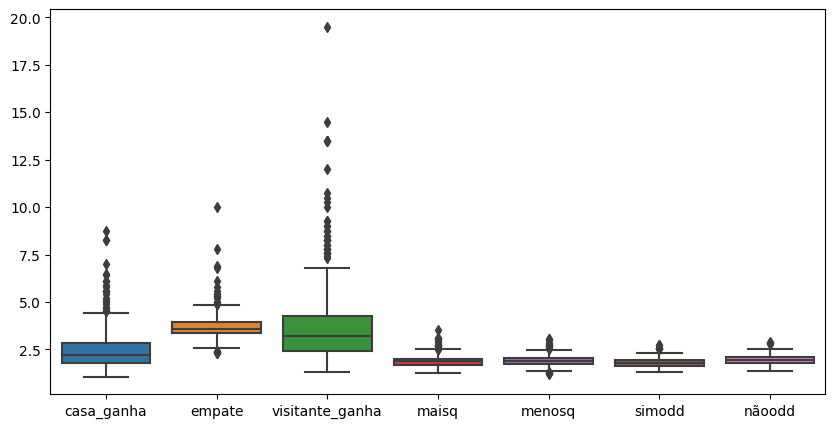

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_semNulo)

Existem alguns outliers, esses representam valores onde as odds foram muito altas (além do "normal")

In [84]:
# Por fim salvando o dataset
df_semNulo.to_csv('dados/dados tratados/jogos_betano_tratado.csv')